# Task: predict if a person survived or not
# survived: dependant variable
# rest are independent variables

# Titanic Dataset

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [71]:
train = pd.read_csv('tested.csv')

In [72]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Missing values

In [73]:
 train.isnull()     # checks for null values

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
413,False,False,False,False,False,True,False,False,False,False,True,False
414,False,False,False,False,False,False,False,False,False,False,False,False
415,False,False,False,False,False,False,False,False,False,False,True,False
416,False,False,False,False,False,True,False,False,False,False,True,False


<Axes: >

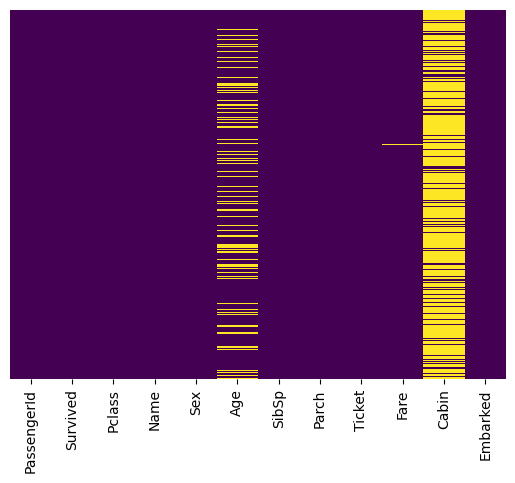

In [74]:
sns.heatmap(train.isnull(), yticklabels=False, cbar = False, cmap = 'viridis')

<Axes: xlabel='Survived', ylabel='count'>

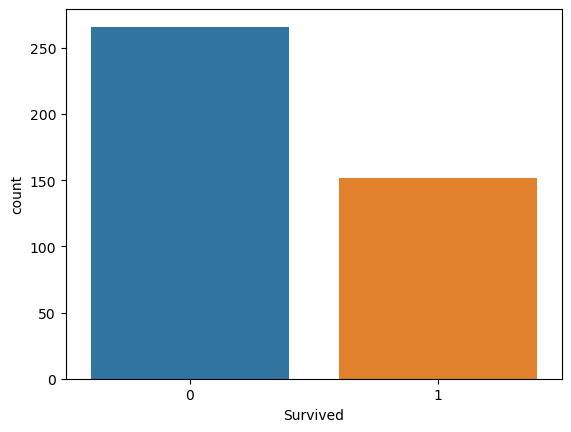

In [75]:
sns.countplot(x = 'Survived', data = train)

<Axes: xlabel='Survived', ylabel='count'>

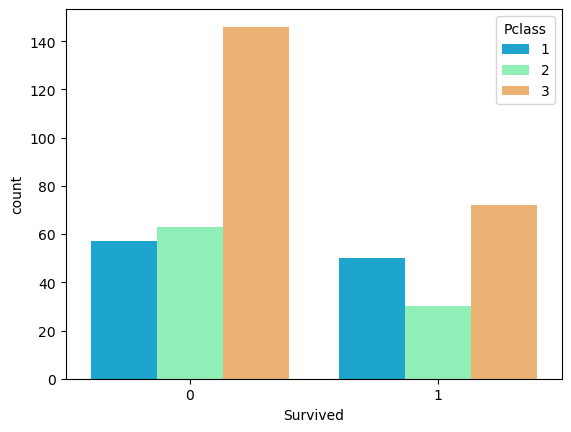

In [76]:
sns.countplot(x = 'Survived', hue = 'Pclass', data = train, palette = 'rainbow')

<Axes: xlabel='Survived', ylabel='count'>

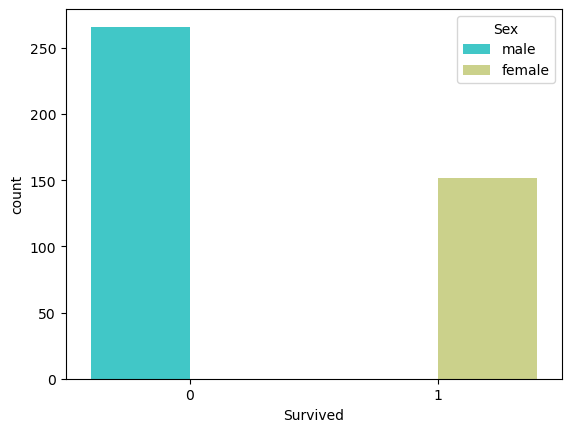

In [77]:
sns.countplot(x = 'Survived', hue = 'Sex', data = train, palette = 'rainbow')

<Axes: >

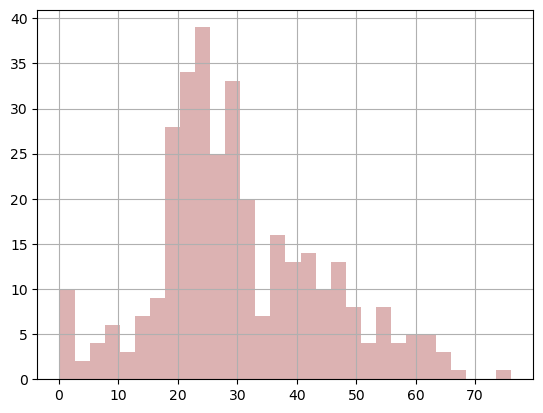

In [78]:
train['Age'].hist(bins = 30, color = 'darkred', alpha = 0.3)

<Axes: xlabel='SibSp', ylabel='count'>

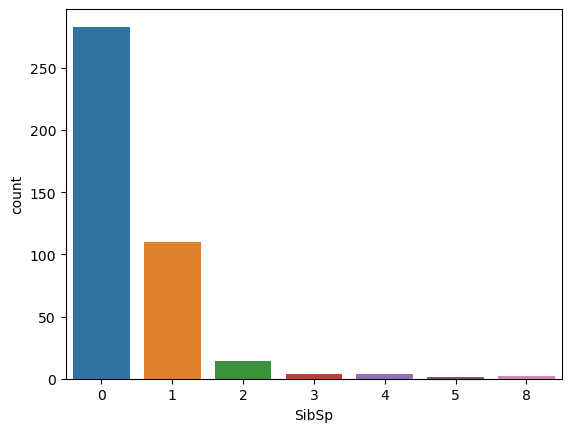

In [79]:
sns.countplot(x = 'SibSp', data = train)

<Axes: >

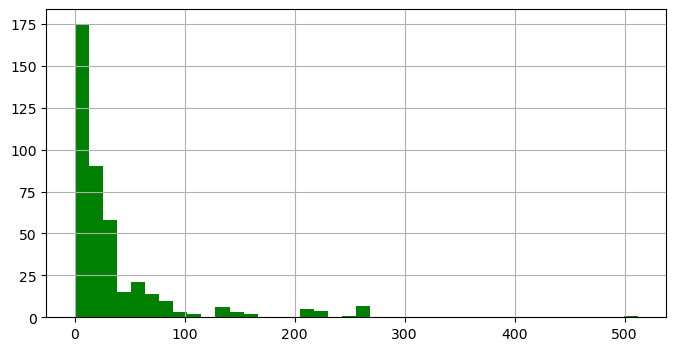

In [80]:
train['Fare'].hist(color = 'green', bins = 40, figsize = (8,4))

<Axes: xlabel='Pclass', ylabel='Age'>

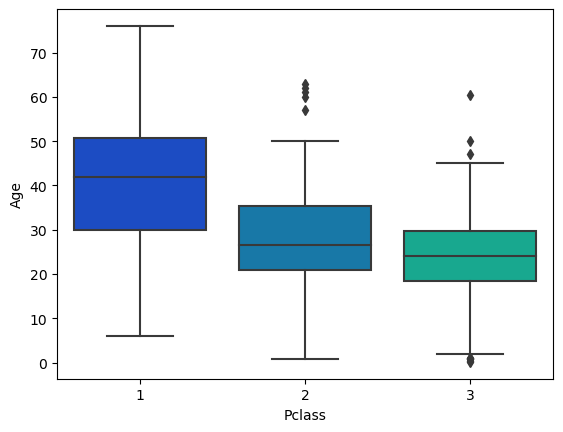

In [81]:
sns.boxplot(x = 'Pclass', y = 'Age', data = train, palette = 'winter')

# make a function to replace null values in age with the average values

In [82]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 42
        
        if Pclass == 2:
            return 26
        
        if Pclass == 3:
            return 24
        
    else:
        return Age
        

In [83]:
def impute_fare(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 42
        
        if Pclass == 2:
            return 26
        
        if Pclass == 3:
            return 24
        
    else:
        return Age

In [84]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis = 1)

<Axes: >

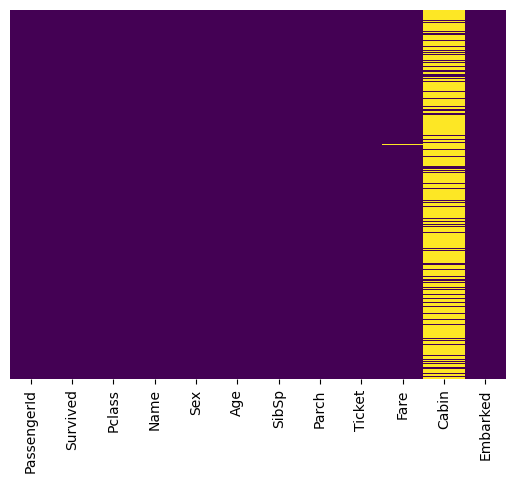

In [85]:
sns.heatmap(train.isnull(), yticklabels=False, cbar = False, cmap = 'viridis')

In [86]:
columns_to_check = ['Fare']
train = train.dropna(subset=columns_to_check, how='any')

# drop the cabin column because it has too much null values

In [87]:
train.drop('Cabin', axis = 1, inplace = True)

In [88]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


<Axes: >

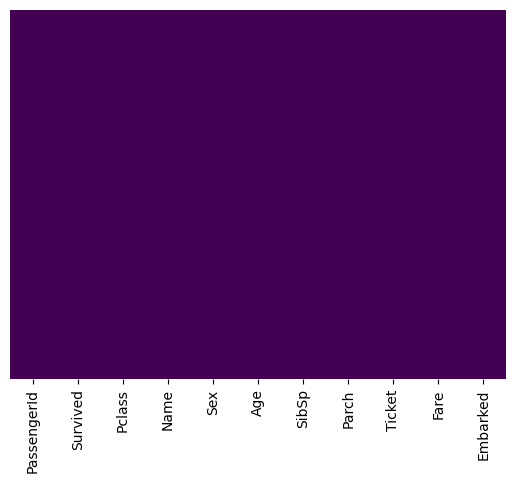

In [89]:
sns.heatmap(train.isnull(), yticklabels=False, cbar = False, cmap = 'viridis')

# convert categoriacal features to values

In [90]:
pd.get_dummies(train['Embarked'], drop_first = True).head()

,Q,S
0,1,0
1,0,1
2,1,0
3,0,1
4,0,1


# create new columns for categorical data

In [91]:
sex = pd.get_dummies(train['Sex'], drop_first = True)
embark = pd.get_dummies(train['Embarked'], drop_first = True)

In [92]:
train.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis = 1, inplace = True)

In [93]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,892,0,3,34.5,0,0,7.8292
1,893,1,3,47.0,1,0,7.0000
2,894,0,2,62.0,0,0,9.6875
3,895,0,3,27.0,0,0,8.6625
4,896,1,3,22.0,1,1,12.2875


# Add new columns to the data

In [94]:
train = pd.concat([train,sex,embark], axis = 1)

In [95]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,0,3,34.5,0,0,7.8292,1,1,0
1,893,1,3,47.0,1,0,7.0000,0,0,1
2,894,0,2,62.0,0,0,9.6875,1,1,0
3,895,0,3,27.0,0,0,8.6625,1,0,1
4,896,1,3,22.0,1,1,12.2875,0,0,1


# Data is ready now lets apply a logistic regression model

# Train test split

In [96]:
train.drop('Survived', axis = 1).head()    # this is your training set

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,0
3,895,3,27.0,0,0,8.6625,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1


In [97]:
train['Survived'].head()     # this is output set

0    0
1    1
2    0
3    0
4    1
Name: Survived, dtype: int64

In [98]:
from sklearn.model_selection import train_test_split

In [99]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived', axis = 1), train['Survived'], test_size = 0.30, random_state = 101)

In [100]:
from sklearn.linear_model import LogisticRegression

In [101]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

C:\Users\Ahmar Hussain\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [107]:
predictions = logmodel.predict(X_test)

In [108]:
from sklearn.metrics import confusion_matrix

In [109]:
accuracy = confusion_matrix(y_test, predictions)

In [110]:
accuracy

array([[65,  0],
       [ 0, 61]], dtype=int64)

In [111]:
from sklearn.metrics import accuracy_score

In [112]:
accuracy = accuracy_score(y_test, predictions)

In [113]:
accuracy

1.0